## Table of Contents

    1. Import libraries and data set
    2. Data wrangling
    3. Elbow technique
    4. k-means algorithm
        4.1 Scatterplot analysis
        4.2 Descriptive statistics

# 01. Import libraries and data set

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create a path for easier importing
path = r'C:\Users\blim9\Desktop\Career Foundry\Data Immersion\Achievement 6\World Happiness Report'

In [4]:
# Import the data set
df = pd.read_csv(os.path.join (path, '02. Data', 'Prepared Data', 'cleaned_revised_dataset.csv'), index_col = 0)

In [5]:
df.head()

,Country,Region,Continent,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity),Dystopia Residual,Happiness Status
0,Switzerland,Western Europe,Europe,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Happy country
1,Iceland,Western Europe,Europe,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Happy country
2,Denmark,Western Europe,Europe,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Happy country
3,Norway,Western Europe,Europe,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Happy country
4,Canada,North America,North America,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Happy country


# 02. Data wrangling

In [6]:
# Remove the categorical columns such as Country, Region, Continent, and Happiness Status
# Create a subset to hold the remaining numerical columns
df_subset = df.drop(columns = ['Country', 'Region', 'Continent', 'Happiness Status'])

In [7]:
df_subset.head()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity),Dystopia Residual
0,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# 03. Elbow technique

In [8]:
# Use the elbow technique to determine the optimal number of clusters
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters = i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [9]:
score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\blim9\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[-1594150.7274543466,
 -400619.1154393685,
 -179488.09793387106,
 -101748.81501671093,
 -65941.02167942718,
 -46752.671699950595,
 -34666.042596912994,
 -26976.27869074307,
 -21759.98935298654]

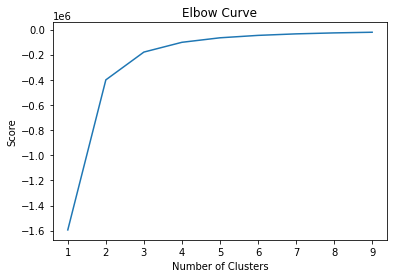

In [10]:
# Plot the above curve using PyLab
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The optimal number of clusters is three, as there's a large jump from two to three on the x-axis, but the curve begins to straighten out after that.

# 04. k-means Algorithm

In [11]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)

In [12]:
# Fit the k-means object to the data
kmeans.fit(df_subset)

KMeans(n_clusters=3)

In [13]:
df_subset['clusters'] = kmeans.fit_predict(df_subset)

In [14]:
df_subset.head()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity),Dystopia Residual,clusters
0,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1
1,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1
2,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1
3,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,1
4,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,1


In [15]:
# Check how many values each number of clusters has
df_subset['clusters'].value_counts()

0    262
2    260
1    259
Name: clusters, dtype: int64

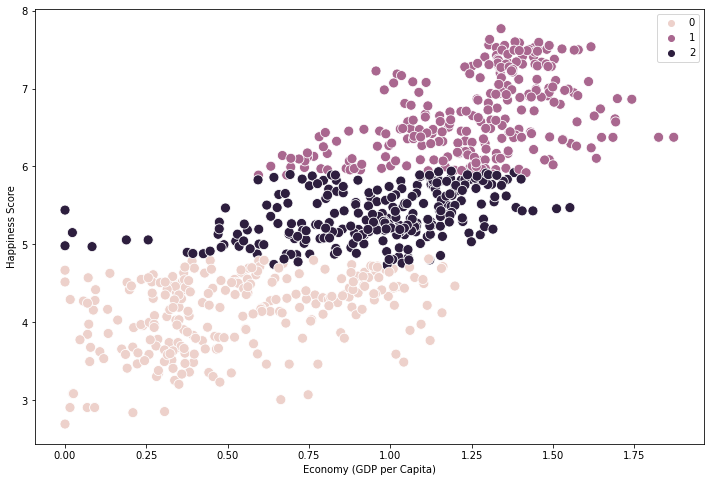

In [16]:
# Plot the clusters for the 'Economy (GDP per Capita)' and 'Happiness Score' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_subset['Economy (GDP per Capita)'], y = df_subset['Happiness Score'], hue = kmeans.labels_, s = 100)

ax.grid = False
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

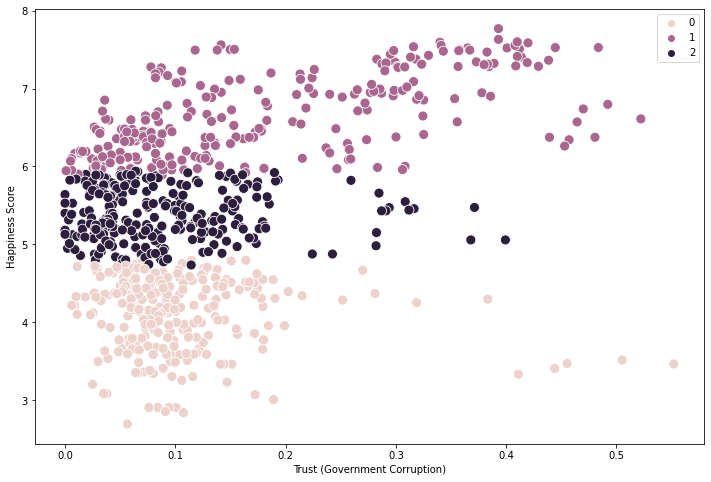

In [17]:
# Plot the clusters for the 'Trust (Government Corruption)' and 'Happiness Score' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_subset['Trust (Government Corruption)'], y = df_subset['Happiness Score'], hue = kmeans.labels_, s = 100)

ax.grid = False
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.show()

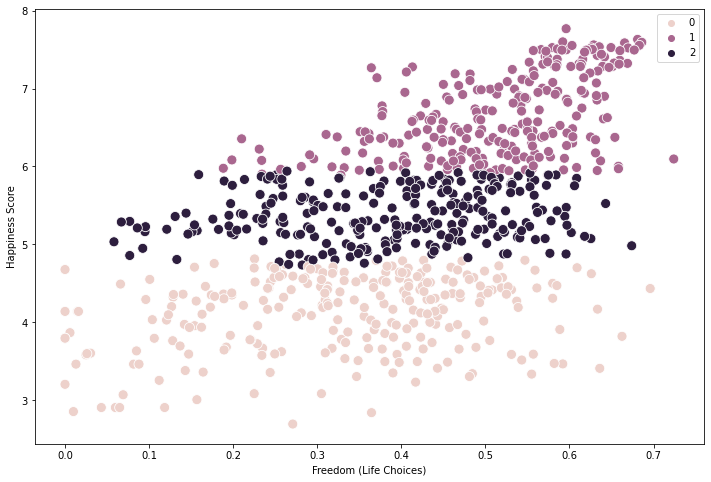

In [18]:
# Plot the clusters for the 'Freedom (Life Choices)' and 'Happiness Score' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_subset['Freedom (Life Choices)'], y = df_subset['Happiness Score'], hue = kmeans.labels_, s = 100)

ax.grid = False
plt.xlabel('Freedom (Life Choices)')
plt.ylabel('Happiness Score')
plt.show()

## 4.1 Scatterplot Analysis

**Economy and Happiness Score**: The dark purple cluster (1) have a happiness score of at least 6, and an economy score of at least 0.6. The peach cluster (0) are within the mid-range happiness score of just under 5 to maximum 6. There are a few outliers where the economy score is very low, but majority of the cluster 0.5 to 1.5 score. Last but not least, the black cluster (2) do not have happiness scores above 5. There data points are spread out in low ranges and the maximum does not even surpass 1.25. 

**Trust and Happiness Score**: This scatterplot surprised me the most. The dark purple cluster (1) is almost evenly split with trust scores ranging from low to high. Although the dark purple cluster (1) are considered happy countries (happiness score of at least 6), the fact that half of them have low trust scores is surprising. A low trust score means that they do not trust in their government, whereas half do. However, this doesn't seem to affect their happiness score that much indicating that perhaps it doesn't have a large impact on their lives. The peach cluster (0) have a large cluster of data points with trust scores between 0 and 0.2 There are some points with higher scores but these clusters do not have a happiness score above 6. The black cluster (2) is similar to the peach cluster and have some data points with very high trust scores, yet their happiness score is not higher than 4.

**Freedom and Happiness Score**: This chart makes sense because of some partial amount of segregation with the clusters. The dark purple cluster (1) have freedom scores of at least 0.2 up to a maximum of over 0.7. The freedom to make choices does matter and can affect a person's happiness. If they are controlled and restricted, their scores would be much lower. The peach cluster (0) have similar scores, but their minimum freedom score is lower than the dark purple cluster. The black cluster (2) have even lower freedom scores, with some as low as 0. Although their data points are spread out, this tells me that freedom isn't the most impactful factor.

## 4.2 Descriptive Statistics

In [19]:
# Create a 'cluster' column based on the clusters for easier interpretation

df_subset.loc[df_subset['clusters'] == 2, 'cluster'] = 'Black'
df_subset.loc[df_subset['clusters'] == 1, 'cluster'] = 'Purple'
df_subset.loc[df_subset['clusters'] == 0, 'cluster'] = 'Peach'

In [20]:
df_subset['cluster'].value_counts()

Peach     262
Black     260
Purple    259
Name: cluster, dtype: int64

In [21]:
# Group the 'cluster' column and aggregate its mean and median for each colour
df_subset.groupby('cluster').agg({'Economy (GDP per Capita)': ['mean', 'median'],
                                 'Trust (Government Corruption)': ['mean', 'median'],
                                 'Freedom (Life Choices)': ['mean', 'median']})

Economy (GDP per Capita)           Trust (Government Corruption)  \
                            mean    median                          mean   
cluster                                                                    
Black                   0.957150  0.996375                      0.089163   
Peach                   0.528382  0.471775                      0.102275   
Purple                  1.262386  1.307820                      0.185278   

                  Freedom (Life Choices)            
           median                   mean    median  
cluster                                             
Black    0.073173               0.387908  0.406665  
Peach    0.085910               0.331195  0.351794  
Purple   0.148680               0.515676  0.536747

#### This is only showcasing three of the six factors that are used to make up the happiness score of a country. Although this does not depict an accurate or full picture, the purple cluster has the best stats amongst the clusters. From the visualizations, the economy score seems to play a big role in everyday life with fairly high scores, especially in the purple cluster. The mean is 1.26, which is quite high compared to the other factors that were showcased.

#### This was mentioned earlier, but the score consists of six factors so looking at one individually will not tell much. However, it makes sense that a country's economy and living conditions can be of significance.